# Telecom

## Table of Contents

- [1. Introduction](#1-introduction)
- [2. Objectives](#2-objectives)
- [3. Data Import](#3-data-import)
  - [3.1 Load Libraries](#31-load-libraries)
  - [3.2 Load DataFrames](#32-load-dataframes)
- [4. Data Analysis and Overview](#4-data-analysis-and-overview)
  - [4.1 Contract](#41-contract)
    - [4.1.1 Data Summary](#411-data-summary)
    - [4.1.2 Missing and Duplicate Values](#412-missing-and-duplicate-values)
    - [4.1.3 Vertical Bar Chart](#413-vertical-bar-chart)
    - [4.1.4 Histogram](#414-histogram)
  - [4.2 Internet](#42-internet)
    - [4.2.1 Data Summary](#421-data-summary)
    - [4.2.2 Missing and Duplicate Values](#422-missing-and-duplicate-values)
    - [4.2.3 Vertical Bar Chart](#423-vertical-bar-chart)
    - [4.2.4 Histogram](#424-histogram)
    - [4.2.5 Correlation](#425-correlation)
  - [4.3 Personal](#43-personal)
    - [4.3.1 Data Summary](#431-data-summary)
    - [4.3.2 Missing and Duplicate Values](#432-missing-and-duplicate-values)
    - [4.3.3 Graphics](#433-graphics)
      - [4.3.3.1 Distribution of Gender](#4331-distribution-of-gender)
      - [4.3.3.2 Bar Plot for 'Partner'](#4332-bar-plot-for-partner)
      - [4.3.3.3 Bar Plot for 'Dependents'](#4333-bar-plot-for-dependents)
      - [4.3.3.4 Histogram for 'SeniorCitizen'](#4334-histogram-for-seniorcitizen)
      - [4.3.3.5 Combined Plot: Gender vs Dependents](#4335-combined-plot-gender-vs-dependents)
  - [4.4 Phone](#44-phone)
    - [4.4.1 Data Summary](#441-data-summary)
    - [4.4.2 Missing and Duplicate Values](#442-missing-and-duplicate-values)
    - [4.4.3 Graphics](#443-graphics)
      - [4.4.3.1 Bar Plot for the 'MultipleLines' Distribution](#4431-bar-plot-for-the-multiplelines-distribution)
      - [4.4.3.2 Pie Chart for the 'MultipleLines' Distribution](#4432-pie-chart-for-the-multiplelines-distribution)
      - [4.4.3.3 Count Plot for the 'MultipleLines'](#4433-count-plot-for-the-multiplelines)
- 5. [Results](#results)
- 6. [Conclusion](#conclusion)

## Introduction
Interconnect, a media communications administrator, tries to gauge client stir rates to proactively offer advancements and exceptional designs to clients who might be intending to drop their administrations. By seeing early signs of likely abrogations, the promoting group plans to hold important clients through designated mediations. The organization offers various administrations including fixed-line correspondence, web access, online security, specialized help, distributed storage, and real time features. With a scope of installment choices and agreement terms, Interconnect expects to construct enduring associations with its clients while giving fitted answers for their correspondence and diversion needs.

## Objectives
* __Client Beat Expectation__: To foster a model that can foresee client stir by breaking down the accessible information, distinguishing examples and patterns related with clients who are probably going to drop their administrations.

* __Distinguish Key Markers__: To investigate and recognize key factors and client ways of behaving that add to stir, for example, contract type, installment technique, administration utilization, and extra administrations picked

## Data Import 

### Load libraries

In [1]:
!pip install scikit-learn
!pip install lightgbm

In [2]:
# Importing libraries
import pandas as pd        
import numpy as np          
import matplotlib.pyplot as plt  
import seaborn as sns       
from scipy import stats as st 
from sklearn.preprocessing import LabelEncoder,StandardScaler

### Load dataframes

In [3]:
# Load the data files into different DataFrames
contract = pd.read_csv('contract.csv') 
internet = pd.read_csv('internet.csv')
personal = pd.read_csv('personal.csv')
phone = pd.read_csv('phone.csv')

In [4]:
# Set customerID as the index
contract.set_index('customerID', inplace=True)
internet.set_index('customerID', inplace=True)
personal.set_index('customerID', inplace=True)
phone.set_index('customerID', inplace=True)

## Data analyst and overview

### Contract

#### Data Summary

In [5]:
# Displaying general structure
print("\n" + "=" * 60)
print("General Structure of the DataFrame".center(60, "="))
print(contract.info())

# Displaying descriptive statistics with better formatting
print("\n" + "=" * 60)
print("Descriptive Statistics".center(60, "="))
print(contract.describe(include='all').to_string())  # Ensures the table remains formatted properly
print("=" * 60)


=============General Structure of the DataFrame=============
<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BeginDate         7043 non-null   object 
 1   EndDate           7043 non-null   object 
 2   Type              7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(6)
memory usage: 440.2+ KB
None

===================Descriptive Statistics===================
         BeginDate EndDate            Type PaperlessBilling     PaymentMethod  MonthlyCharges TotalCharges
count         7043    7043            7043             7043              7043     7043.000000         7043
unique          77       5               3                2     

The DataFrame consists of a total of 7,043 rows and 8 columns, representing a moderately large dataset. Regarding the initial data types, the `MonthlyCharges` column is stored as a numeric value of type `float64`, while the other columns, such as `customerID`, `BeginDate`, and `EndDate`, are categorized as objects (`object`). This indicates that transformations may be necessary, such as converting relevant columns (e.g., dates and numeric values stored as text) to ensure the data is properly structured and suitable for analysis.


In [6]:
# Corrections
# Converting 'TotalCharges' to numeric
contract['TotalCharges'] = pd.to_numeric(contract['TotalCharges'], errors='coerce').fillna(0).astype(float)

# Convert 'BeginDate' and 'EndDate' to datetime format
contract['BeginDate'] = pd.to_datetime(contract['BeginDate'], errors='coerce')
contract['EndDate'] = pd.to_datetime(contract['EndDate'], errors='coerce')


C:\Users\Felip\AppData\Local\Temp\ipykernel_20312\3964061073.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  contract['EndDate'] = pd.to_datetime(contract['EndDate'], errors='coerce')


*  This ensures that the TotalCharges column is properly formatted as numerical data, ready for calculations or analysis.
*  These lines transform the `BeginDate` and `EndDate` columns into a datetime format. This enables time-based operations, such as calculating durations. The `errors='coerce'` parameter converts invalid values into `NaT` (Not a Time) instead of raising an error.
* Removes any leading or trailing spaces from the customerID column, ensuring that the IDs are consistent and free of formatting issues.


In [7]:
# Strip spaces and convert text to lowercase for consistency
contract['Type'] = contract['Type'].str.strip().str.lower()
contract['PaperlessBilling'] = contract['PaperlessBilling'].str.strip().str.lower()
contract['PaymentMethod'] = contract['PaymentMethod'].str.strip().str.lower()

# Print unique values in each relevant column
print("Unique values in 'Type' column:", contract['Type'].unique())
print("Unique values in 'PaperlessBilling' column:", contract['PaperlessBilling'].unique())
print("Unique values in 'PaymentMethod' column:", contract['PaymentMethod'].unique())

Unique values in 'Type' column: ['month-to-month' 'one year' 'two year']
Unique values in 'PaperlessBilling' column: ['yes' 'no']
Unique values in 'PaymentMethod' column: ['electronic check' 'mailed check' 'bank transfer (automatic)'
 'credit card (automatic)']


Strips unnecessary spaces and converts text to lowercase in the `Type`, `PaperlessBilling`, and `PaymentMethod` columns. This creates a consistent format for categorical data, which is crucial for grouping or filtering operations.

In [8]:
# Printing the descriptive statistics 
print("=" * 60)
print("Descriptive Statistics".center(60, "="))
print("\n", contract.describe(include='all').to_string(), "\n")

# Printing the first rows
print("=" * 60)
print("First Rows".center(60, "="))
print()
print(contract.head().to_string(index=False))  # Removing the index for a cleaner format
print("=" * 60)

===================Descriptive Statistics===================

                             BeginDate                        EndDate            Type PaperlessBilling     PaymentMethod  MonthlyCharges  TotalCharges
count                            7043                           1869            7043             7043              7043     7043.000000   7043.000000
unique                            NaN                            NaN               3                2                 4             NaN           NaN
top                               NaN                            NaN  month-to-month              yes  electronic check             NaN           NaN
freq                              NaN                            NaN            3875             4171              2365             NaN           NaN
mean    2017-04-30 13:01:50.918642688  2019-11-15 21:31:18.009630976             NaN              NaN               NaN       64.761692   2279.734304
min               2013-10-01 00:00:00

The output provides a summary of the `contract` DataFrame, including descriptive statistics and a preview of the first rows. The descriptive statistics section shows key details for each column, such as the count, unique values, most frequent value, and numerical measures like the mean, standard deviation, and range for `MonthlyCharges`. It reveals that `customerID` contains 7043 unique values, indicating each customer has a unique identifier, while the `MonthlyCharges` column has a mean of 64.76 with values ranging from 18.25 to 118.75. The first rows section displays a snapshot of the initial records, showing details like contract type, payment method, and charges for customers, with some `EndDate` values marked as "No," indicating active contracts. This initial analysis helps understand the dataset's structure and prepares it for further exploratio


<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con la exploración inicial, lo único que te recomendaría es que cuando se trate de mostrar DataFrames lo hagas con `display()` en lugar de print, ya que print te lo muestra cómo texto y display lo mostrará cómo una tabla aprovechando mejor las capacidades del notebook
</div>

#### Missing and Duplicate Values

In [9]:
# Missing values
print("=" * 60)
print("Missing Values".center(60, "="))
print(contract.isnull().sum().to_string())
print("=" * 60)

# Duplicate rows
print("=" * 60)
print("Duplicate Rows".center(60, "="))
print(contract.duplicated().sum())
print("=" * 60)

=======================Missing Values=======================
BeginDate              0
EndDate             5174
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
=======================Duplicate Rows=======================
45


####  Vertical bar chart

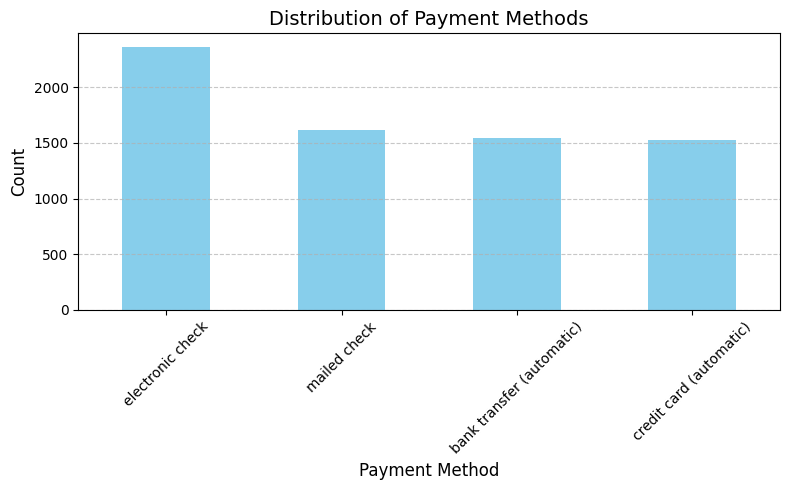

In [10]:
# Bar chart for PaymentMethod
payment_counts = contract['PaymentMethod'].value_counts()

plt.figure(figsize=(8, 5))
payment_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Payment Methods', fontsize=14)
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

This suggests a clear preference for electronic payment over other methods. The higher adoption of 'Electronic check' may be due to its convenience or perhaps specific preferences of the studied user group.

#### Histogram

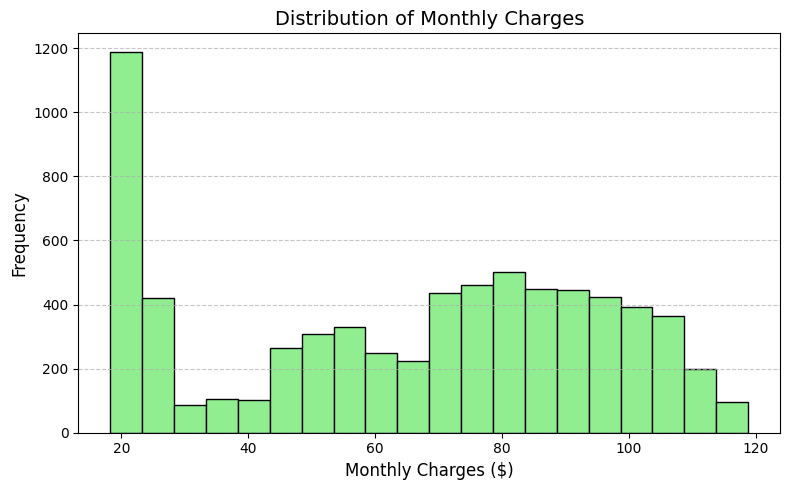

In [11]:
# Histogram for MonthlyCharges
plt.figure(figsize=(8, 5))
plt.hist(contract['MonthlyCharges'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Monthly Charges', fontsize=14)
plt.xlabel('Monthly Charges ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

From the graph, it can be observed that the majority of the charges are clustered at the lower end, with a significant peak in the 0-20 dollar range. This could indicate that many people have relatively low monthly charges. The rest of the distribution is quite spread out, with a noticeable dip around the 40-dollar mark and a fairly even spread from 50 to 120 dollars

### Internet

#### Data summary

In [12]:
# Displaying general structure
print("\n" + "=" * 60)
print("General Structure of the DataFrame".center(60, "="))
print(internet.info())

# Displaying descriptive statistics with better formatting
print("\n" + "=" * 60)
print("Descriptive Statistics".center(60, "="))
print(internet.describe(include='all').to_string())  # Ensures the table remains formatted properly
print("=" * 60)


=============General Structure of the DataFrame=============
<class 'pandas.core.frame.DataFrame'>
Index: 5517 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   InternetService   5517 non-null   object
 1   OnlineSecurity    5517 non-null   object
 2   OnlineBackup      5517 non-null   object
 3   DeviceProtection  5517 non-null   object
 4   TechSupport       5517 non-null   object
 5   StreamingTV       5517 non-null   object
 6   StreamingMovies   5517 non-null   object
dtypes: object(7)
memory usage: 344.8+ KB
None

===================Descriptive Statistics===================
       InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies
count             5517           5517         5517             5517        5517        5517            5517
unique               2              2            2                2           2    

The dataset contains data on 5517 clients, with each record addressing their membership subtleties to different administrations gave by Interconnect. The sections incorporate clear cut information, for example, client ID, web access type (either Fiber optic or DSL), and twofold markers for administrations like internet based security, online reinforcement, gadget insurance, technical support, streaming television, and streaming films. Most of clients buy into fiber optic web, while most don't utilize extra administrations, for example, online security, reinforcement, gadget assurance, technical support, or streaming. This example features the need to break down client inclinations and recognize regions where advertising endeavors could be upgraded to advance help reception.

In [13]:
# List of columns that contain binary data (Yes/No values)
binary_columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Loop through each column and convert the 'Yes'/'No' values to 1 and 0
for column in binary_columns:
    # Convert the column to a categorical type and then use .cat.codes to map 'Yes' to 1 and 'No' to 0
    internet[column] = internet[column].astype('category').cat.codes


# Convert all column names to lowercase
internet.columns = internet.columns.str.lower()
print(internet.head())


           internetservice  onlinesecurity  onlinebackup  deviceprotection  \
customerID                                                                   
7590-VHVEG             DSL               0             1                 0   
5575-GNVDE             DSL               1             0                 1   
3668-QPYBK             DSL               1             1                 0   
7795-CFOCW             DSL               1             0                 1   
9237-HQITU     Fiber optic               0             0                 0   

            techsupport  streamingtv  streamingmovies  
customerID                                             
7590-VHVEG            0            0                0  
5575-GNVDE            0            0                0  
3668-QPYBK            0            0                0  
7795-CFOCW            1            0                0  
9237-HQITU            0            0                0  


In the code, we initially characterize a rundown of sections that contienen dosfold information, específicamente con valores 'Yes'/'No'. We loop through each of these columns and convert the 'Yes'/'No' values into binary format, mapping 'Yes' to 1 and 'No' to 0 using the `.astype('category').cat.codes` method. This approach helps us effectively convert categorical values into numeric ones, which are useful for machine learning models. Later, we convert all column names to lowercase using `str.lower()` to standardize the DataFrame column names and eliminate any inconsistencies caused by different letter cases. Finally, we print the first few rows of the DataFrame to check the changes made.


#### Missing and Duplicate Values

In [14]:
# Missing values
print("=" * 60)
print("Missing Values".center(60, "="))
print(internet.isnull().sum().to_string())
print("=" * 60)

# Duplicate rows
print("=" * 60)
print("Duplicate Rows".center(60, "="))
print(internet.duplicated().sum())
print("=" * 60)

=======================Missing Values=======================
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
=======================Duplicate Rows=======================
5389


####  Vertical bar chart

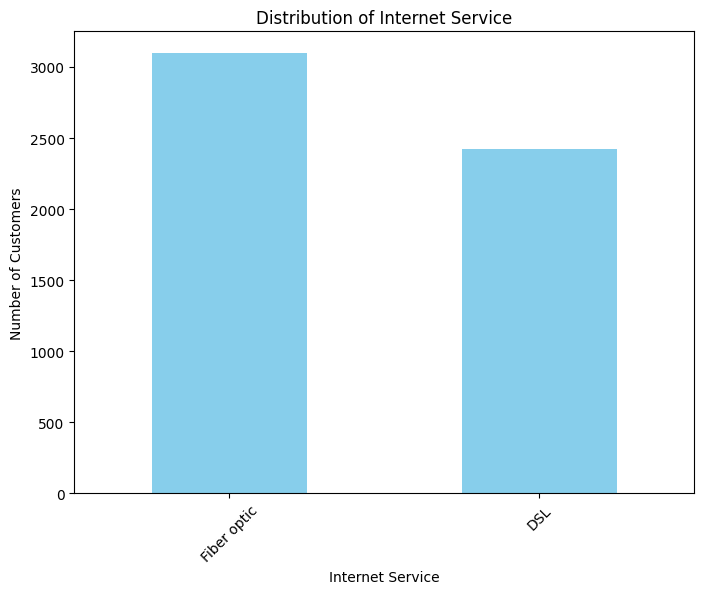

In [15]:
# Bar chart for the distribution of internet service types
internet['internetservice'].value_counts().plot(kind='bar', figsize=(8, 6), color='skyblue')
plt.title('Distribution of Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

The outline shows the appropriation of Internet providers. On the level hub, the two sorts of Internet providers are addressed: fiber optic and DSL. On the upward hub, the quantity of clients is shown, going from 0 to 3000. This proposes an unmistakable inclination for fiber optic among clients. The higher reception of fiber optic could be because of its higher speed and dependability contrasted with DSL.

#### Histogram

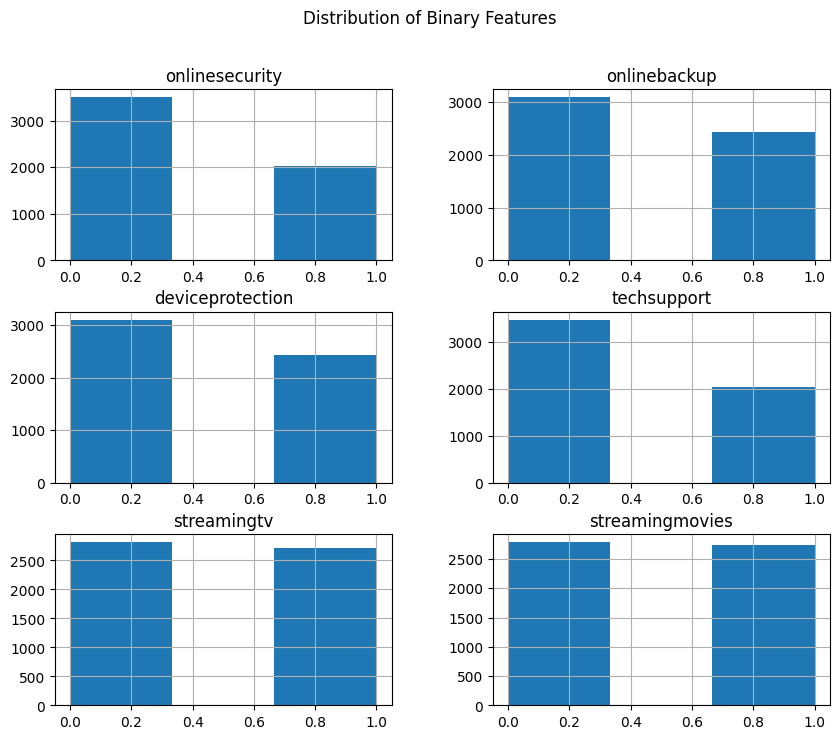

In [16]:
# Plot histogram of binary columns
binary_columns = ['onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies']

internet[binary_columns].hist(bins=3, figsize=(10, 8))
plt.suptitle('Distribution of Binary Features')
plt.show()

This examination shows a general pattern where most clients don't utilize administrations like web-based security, online reinforcement, gadget insurance, and specialized help. In any case, web-based features, both for TV and films, have a more adjusted reception among clients.

#### Correlation

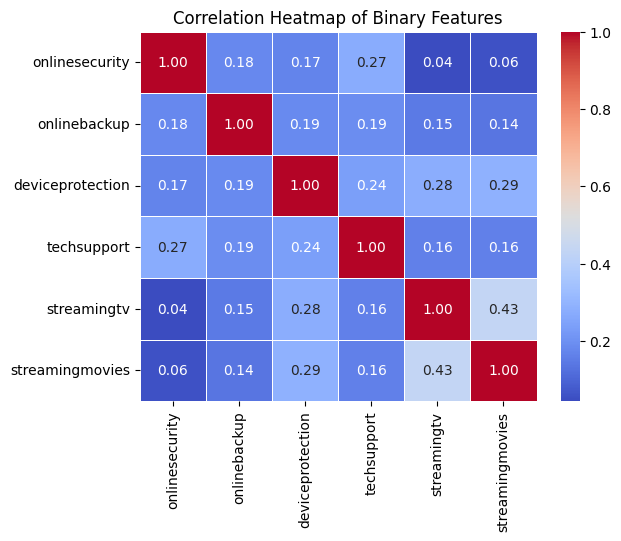

In [17]:
# Create a heatmap of the correlation matrix
correlation_matrix = internet[binary_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Binary Features')
plt.show()

__Online Security__:

- **Online Security and Online Backup**: Correlation of 0.27, indicating a moderate relationship. Users concerned with online security are also likely to use online backup services.

- **Online Security and Device Protection**: Correlation of 0.22, showing a moderate relationship. This suggests that those who invest in online security also tend to protect their devices.

- **Online Security and Tech Support**: Correlation of 0.24, indicating that users who prioritize online security may also require more tech support.

__Online Backup__:

- **Online Backup and Device Protection**: Correlation of 0.31, a stronger relationship. Users who use online backup services also tend to protect their devices.

- **Online Backup and Tech Support**: Correlation of 0.32, suggesting that those who use online backup also require tech support.

- **Online Backup and Streaming Movies**: Correlation of 0.13, a weaker but present relationship. This may indicate that some users who back up their data also enjoy streaming services.

__Device Protection__:

- **Device Protection and Tech Support**: Correlation of 0.24, suggesting that users who protect their devices also value tech support.

- **Device Protection and Streaming TV**: Correlation of 0.19, a weaker but notable relationship. This may indicate a slight preference for entertainment services among those who protect their devices.

__Tech Support__:

- **Tech Support and Streaming TV**: Correlation of 0.22, showing that users who use tech support also tend to use streaming TV services.

- **Tech Support and Streaming Movies**: Correlation of 0.23, a relationship similar to streaming TV.

__Streaming TV and Streaming Movies__:

- **Correlation of 0.43**, the strongest relationship between features, suggesting that users who use streaming TV services also use streaming movie services.


### Personal

#### Data summary

In [18]:
# Displaying general structure
print("\n" + "=" * 60)
print("General Structure of the DataFrame".center(60, "="))
print(personal.info())

# Displaying descriptive statistics with better formatting
print("\n" + "=" * 60)
print("Descriptive Statistics".center(60, "="))
print(personal.describe(include='all').to_string())  # Ensures the table remains formatted properly
print("=" * 60)


=============General Structure of the DataFrame=============
<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         7043 non-null   object
 1   SeniorCitizen  7043 non-null   int64 
 2   Partner        7043 non-null   object
 3   Dependents     7043 non-null   object
dtypes: int64(1), object(3)
memory usage: 275.1+ KB
None

===================Descriptive Statistics===================
       gender  SeniorCitizen Partner Dependents
count    7043    7043.000000    7043       7043
unique      2            NaN       2          2
top      Male            NaN      No         No
freq     3555            NaN    3641       4933
mean      NaN       0.162147     NaN        NaN
std       NaN       0.368612     NaN        NaN
min       NaN       0.000000     NaN        NaN
25%       NaN       0.000000     NaN        NaN
50%       NaN

The DataFrame comprises of 7043 sections and 5 segments: customerid, orientation, seniorcitizen, accomplice, and wards. The customerid segment contains one of a kind identifiers for every client, while the orientation, accomplice, and wards sections are twofold, with values 0 and 1 showing explicit classifications (reasonable Male = 0, Female = 1, and comparably for accomplice and wards status). The seniorcitizen segment contains float values, which could show whether the client is a senior resident, however the negative qualities propose it might require further examination or change. Graphic measurements show that the twofold segments (orientation, accomplice, wards) have a generally adjusted circulation, with half of the information designating 'Yes' (1) for orientation and accomplice, while the seniorcitizen section changes more, demonstrating the requirement for explanation or standardization.

In [19]:
# Convert all column names to lowercase
personal.columns = personal.columns.str.lower()

# Convert categorical columns to numeric using LabelEncoder
label_cols = ['gender', 'partner', 'dependents']  # Adjust this list based on your categorical columns

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for column in label_cols:
    personal[column] = label_encoder.fit_transform(personal[column])

# Now, let's scale the numerical columns (like 'SeniorCitizen' if needed)
scaler = StandardScaler()

# You can scale any numerical columns, assuming 'SeniorCitizen' is the only one
personal['seniorcitizen'] = scaler.fit_transform(personal[['seniorcitizen']])

# Display the first few rows of the updated DataFrame
print(personal.head())

            gender  seniorcitizen  partner  dependents
customerID                                            
7590-VHVEG       0      -0.439916        1           0
5575-GNVDE       1      -0.439916        0           0
3668-QPYBK       1      -0.439916        0           0
7795-CFOCW       1      -0.439916        0           0
9237-HQITU       0      -0.439916        0           0


We standardized the individual DataFrame by converting all column names to lowercase using the `.str.lower()` method. This step ensures consistency in the column names, which makes it easier to work with the data, as it removes any issues related to case sensitivity. Normalizing the column names in this way is important for maintaining cleaner code and preventing potential errors when referencing these columns in future analysis 



#### Missing and Duplicate Values

In [20]:
# Missing values
print("=" * 60)
print("Missing Values".center(60, "="))
print(personal.isnull().sum().to_string())
print("=" * 60)

# Duplicate rows
print("=" * 60)
print("Duplicate Rows".center(60, "="))
print(personal.duplicated().sum())
print("=" * 60)

=======================Missing Values=======================
gender           0
seniorcitizen    0
partner          0
dependents       0
=======================Duplicate Rows=======================
7027


#### Graphics

##### Distribution of gender

C:\Users\Felip\AppData\Local\Temp\ipykernel_20312\3089956677.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=personal, x='gender', palette='pastel')


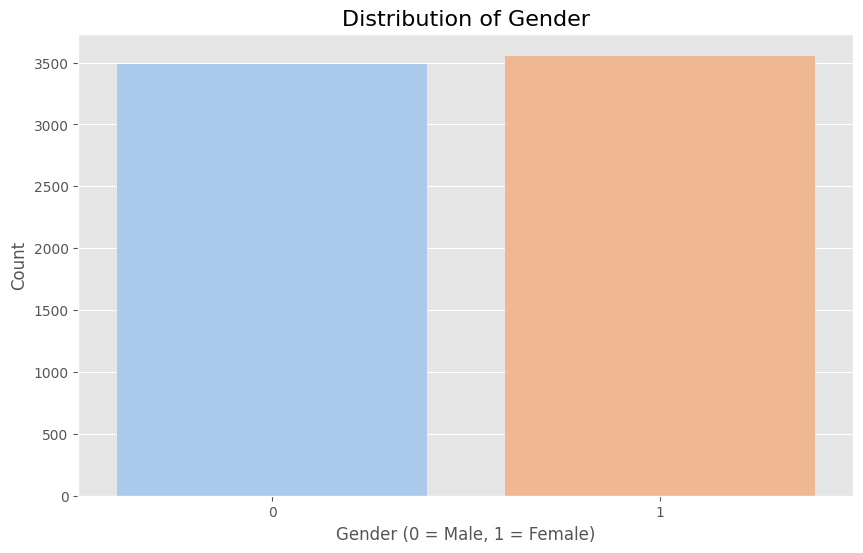

In [21]:
# General plot setup
def setup_plot():
    plt.style.use('ggplot')  # Apply a universal style
    plt.rcParams['figure.figsize'] = (10, 6)  # Set default figure size
    plt.rcParams['axes.titlesize'] = 16  # Set default title size

# Bar plot for 'gender'
setup_plot()
sns.countplot(data=personal, x='gender', palette='pastel')
plt.title('Distribution of Gender')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Count')
plt.show()



The outline shows the orientation circulation. The x-hub is named 'Orientation (0 = Male, 1 = Female),' and the y-hub is marked 'Count.' The graph shows two bars: one for orientation 0 (Male) and one for orientation 1 (Female). The two bars have counts near 3500, demonstrating a practically equivalent circulation of guys and females in the dataset.

##### Bar plot for 'Partner'

C:\Users\Felip\AppData\Local\Temp\ipykernel_20312\1668637168.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=personal, x='partner', palette='muted')


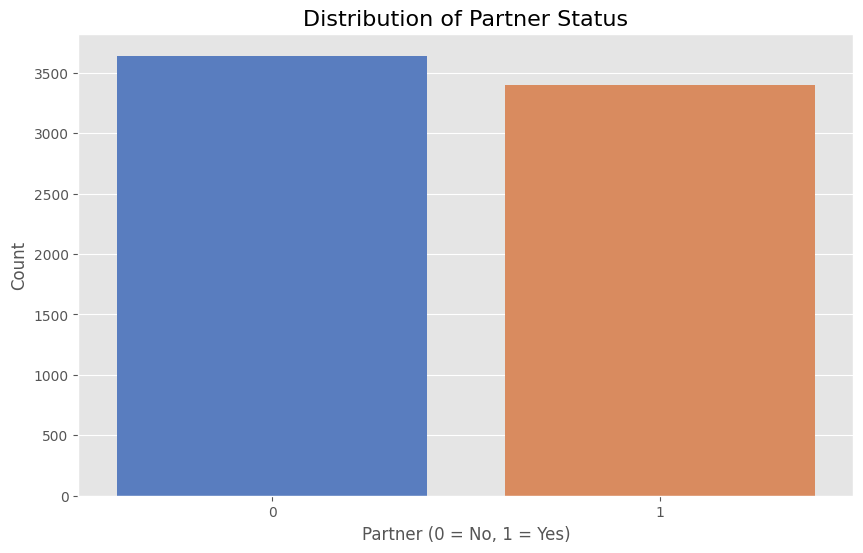

In [22]:
# Bar plot for 'partner'
setup_plot()
sns.countplot(data=personal, x='partner', palette='muted')
plt.title('Distribution of Partner Status')
plt.xlabel('Partner (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


This graph is intriguing the fact that it outwardly shows the dissemination of conjugal status inside a given populace, featuring that there is a practically equivalent number of individuals with and without an accomplice, with a slight greater part being without an accomplice

##### Bar plot for 'dependents'

C:\Users\Felip\AppData\Local\Temp\ipykernel_20312\1406933808.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=personal, x='dependents', palette='cool')


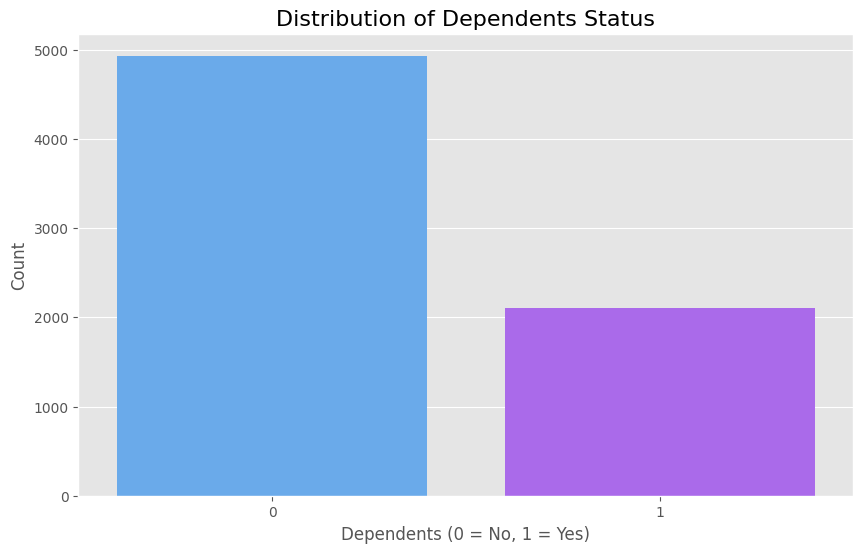

In [23]:
# Bar plot for 'dependents'
setup_plot()
sns.countplot(data=personal, x='dependents', palette='cool')
plt.title('Distribution of Dependents Status')
plt.xlabel('Dependents (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

This demonstrates that there are more people without wards contrasted with those with wards in the dataset. This data is important for grasping the dispersion of ward status inside the concentrated on populace.

##### Histogram for 'seniorcitizen'

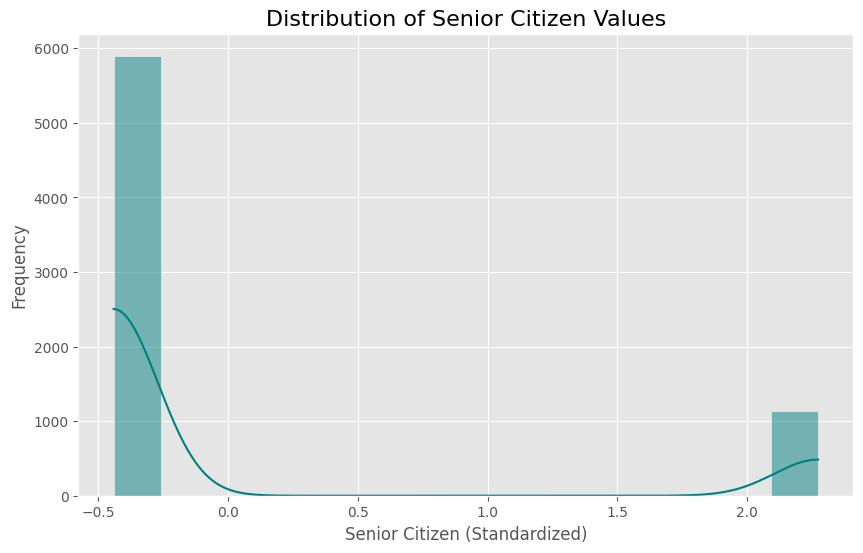

In [24]:
# Histogram for 'seniorcitizen'
setup_plot()
sns.histplot(data=personal, x='seniorcitizen', kde=True, bins=15, color='teal')
plt.title('Distribution of Senior Citizen Values')
plt.xlabel('Senior Citizen (Standardized)')
plt.ylabel('Frequency')
plt.show()

This diagram shows a bimodal dispersion, demonstrating the presence of two unmistakable gatherings inside the information. For this situation, it appears to be that most senior residents have normalized values around - 0.5, while a more modest gathering has values around 2.0.

The bimodality might propose huge contrasts between these two gatherings regarding some basic trademark or variable.

##### Combined plot: Gender vs Dependents

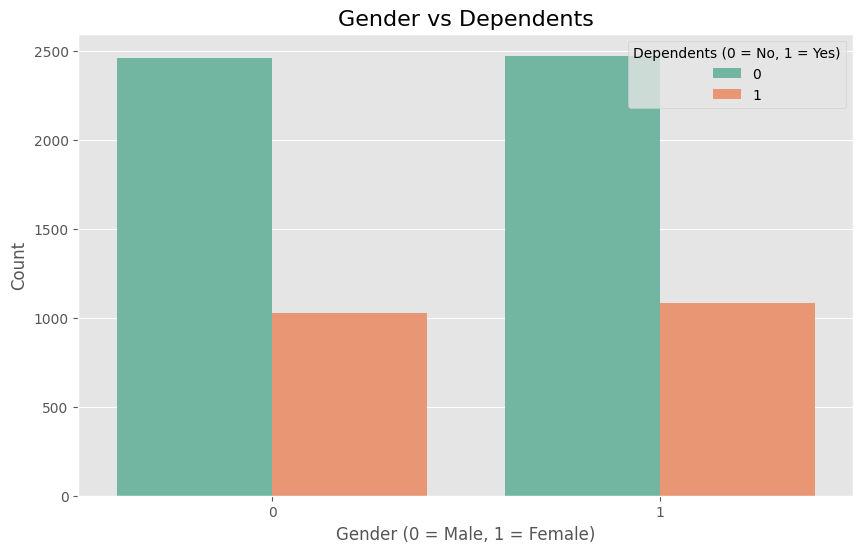

In [25]:
# Combined plot: Gender vs Dependents
setup_plot()
sns.countplot(data=personal, x='gender', hue='dependents', palette='Set2')
plt.title('Gender vs Dependents')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Count')
plt.legend(title='Dependents (0 = No, 1 = Yes)')
plt.show()

This is intriguing on the grounds that it shows the circulation of wards among people, demonstrating that a comparable number of people have wards.

This examination proposes that the obligation of wards is genuinely adjusted between the two sexual orientations in the concentrated on populace.

### Phone

#### Data summary

In [26]:
# Displaying general structure
print("\n" + "=" * 60)
print("General Structure of the DataFrame".center(60, "="))
print(phone.info())

# Displaying descriptive statistics with better formatting
print("\n" + "=" * 60)
print("Descriptive Statistics".center(60, "="))
print(phone.describe(include='all').to_string())  # Ensures the table remains formatted properly
print("=" * 60)

# Displaying the first few rows of the DataFrame
print("\n" + "=" * 60)
print("First Few Rows of the DataFrame".center(60, "="))
print(phone.head())

print("=" * 60)


=============General Structure of the DataFrame=============
<class 'pandas.core.frame.DataFrame'>
Index: 6361 entries, 5575-GNVDE to 3186-AJIEK
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MultipleLines  6361 non-null   object
dtypes: object(1)
memory usage: 99.4+ KB
None

===================Descriptive Statistics===================
       MultipleLines
count           6361
unique             2
top               No
freq            3390

==============First Few Rows of the DataFrame===============
           MultipleLines
customerID              
5575-GNVDE            No
3668-QPYBK            No
9237-HQITU            No
9305-CDSKC           Yes
1452-KIOVK           Yes


In [27]:
# Convert 'MultipleLines' to categorical type to optimize memory and performance
phone['MultipleLines'] = phone['MultipleLines'].astype('category')

# Replace 'Yes' with 1 and 'No' with 0 in the 'MultipleLines' column
phone['MultipleLines'] = phone['MultipleLines'].replace({'Yes': 1, 'No': 0})


# Convert all column names to lowercase
phone.columns = phone.columns.str.lower()

phone.head()

C:\Users\Felip\AppData\Local\Temp\ipykernel_20312\4273885036.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  phone['MultipleLines'] = phone['MultipleLines'].replace({'Yes': 1, 'No': 0})
C:\Users\Felip\AppData\Local\Temp\ipykernel_20312\4273885036.py:5: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  phone['MultipleLines'] = phone['MultipleLines'].replace({'Yes': 1, 'No': 0})


,multiplelines
customerID,
5575-GNVDE,0
3668-QPYBK,0
9237-HQITU,0
9305-CDSKC,1
1452-KIOVK,1


#### Missing and Duplicate Values

In [28]:
# Missing values
print("=" * 60)
print("Missing Values".center(60, "="))
print(phone.isnull().sum().to_string())
print("=" * 60)


# Duplicate rows

print("=" * 60)
print("Duplicate Rows".center(60, "="))
print(phone.duplicated().sum())
print("=" * 60)

=======================Missing Values=======================
multiplelines    0
=======================Duplicate Rows=======================
6359


In [29]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6361 entries, 5575-GNVDE to 3186-AJIEK
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   multiplelines  6361 non-null   category
dtypes: category(1)
memory usage: 56.0+ KB


#### Graphics

##### Bar Plot for the 'multiplelines' distribution

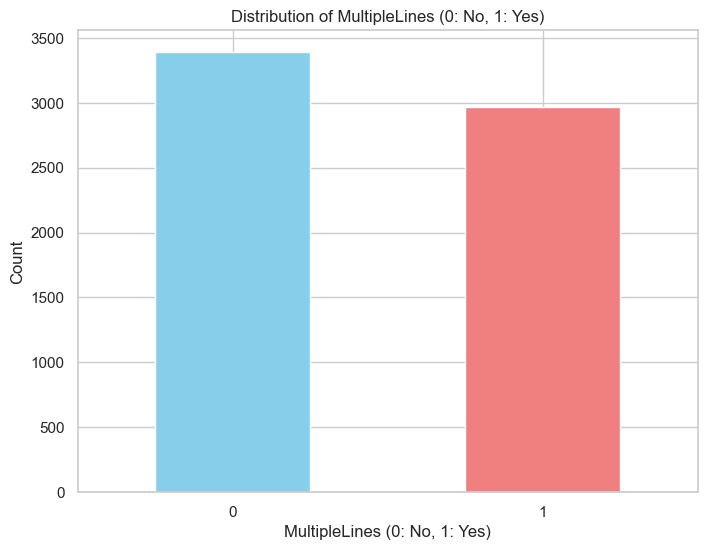

In [30]:
# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# 1. Bar Plot for the 'multiplelines' distribution
plt.figure(figsize=(8, 6))
phone['multiplelines'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Distribution of MultipleLines (0: No, 1: Yes)')
plt.xlabel('MultipleLines (0: No, 1: Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

This chart permits for the simple visualization and comparison of the number of cases in each category of the 'MultipleLines' variable. The contrast between the two categories isn't very large, but there's a slight lion's share within the 'No' category

##### Pie Chart for the 'multiplelines' distribution

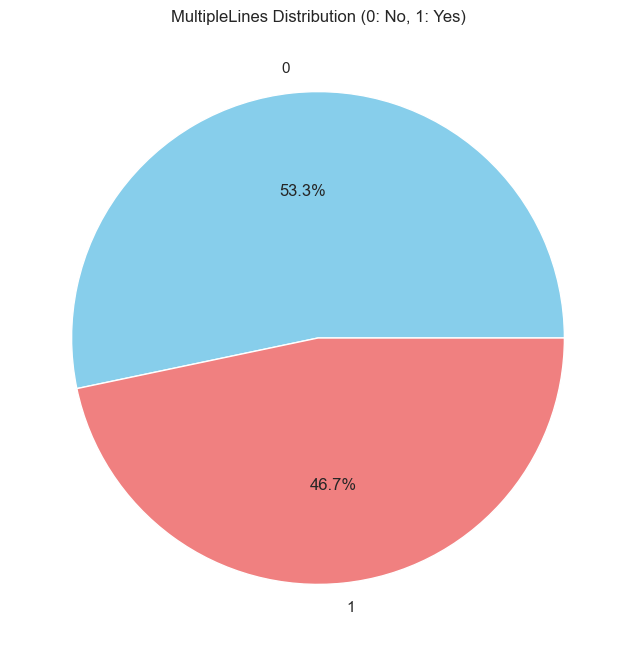

In [31]:
plt.figure(figsize=(8, 8))
phone['multiplelines'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('MultipleLines Distribution (0: No, 1: Yes)')
plt.ylabel('')  # Hide the y-label for a cleaner look
plt.show()

##### Count Plot for the 'multiplelines' 

C:\Users\Felip\AppData\Local\Temp\ipykernel_20312\2413233423.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='multiplelines', data=phone, palette='Set2')


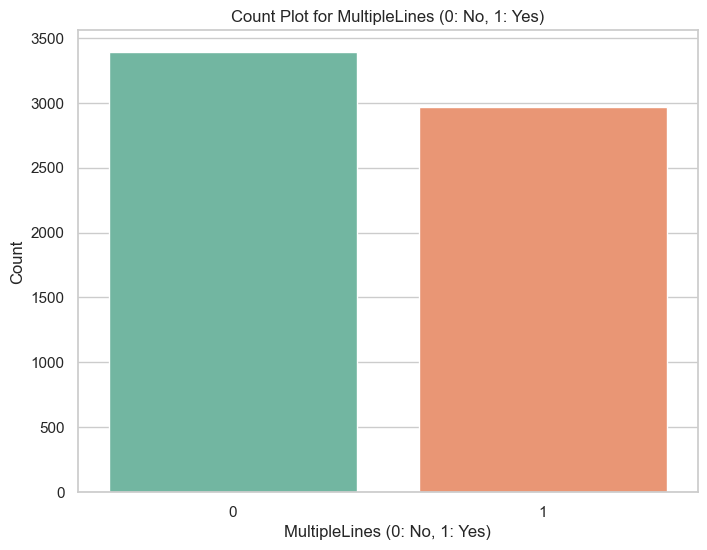

In [32]:
plt.figure(figsize=(8, 6))
sns.countplot(x='multiplelines', data=phone, palette='Set2')
plt.title('Count Plot for MultipleLines (0: No, 1: Yes)')
plt.xlabel('MultipleLines (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

This chart is valuable for visualizing the contrast within the number of cases between the two categories. Although the distinction isn't exceptionally expansive, there are more occasions of 'No' than 'Yes' 

## Dataframes Join

In [33]:
# Outer Join: includes all records from all DataFrames
outer_result = contract.join([internet, personal,phone], how='outer')

print("Outer Join Result:")
print(outer_result.head())  # Display only the first few rows


Outer Join Result:
            BeginDate    EndDate            Type PaperlessBilling  \
customerID                                                          
7590-VHVEG 2020-01-01        NaT  month-to-month              yes   
5575-GNVDE 2017-04-01        NaT        one year               no   
3668-QPYBK 2019-10-01 2019-12-01  month-to-month              yes   
7795-CFOCW 2016-05-01        NaT        one year               no   
9237-HQITU 2019-09-01 2019-11-01  month-to-month              yes   

                        PaymentMethod  MonthlyCharges  TotalCharges  \
customerID                                                            
7590-VHVEG           electronic check           29.85         29.85   
5575-GNVDE               mailed check           56.95       1889.50   
3668-QPYBK               mailed check           53.85        108.15   
7795-CFOCW  bank transfer (automatic)           42.30       1840.75   
9237-HQITU           electronic check           70.70        151.65   


In [34]:
# Missing values
print("=" * 60)
print("Missing Values".center(60, "="))
print(outer_result.isnull().sum().to_string())
print("=" * 60)

# Duplicate rows
print("=" * 60)
print("Duplicate Rows".center(60, "="))
print(outer_result.duplicated().sum())
print("=" * 60)

=======================Missing Values=======================
BeginDate              0
EndDate             5174
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
internetservice     1526
onlinesecurity      1526
onlinebackup        1526
deviceprotection    1526
techsupport         1526
streamingtv         1526
streamingmovies     1526
gender                 0
seniorcitizen          0
partner                0
dependents             0
multiplelines        682
=======================Duplicate Rows=======================
13


In [35]:
# List of services
services = ['internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies','multiplelines']

# New binary columns indicating whether the user has the service
for service in services:
    # Create a new binary column: 1 if the user has the service, 0 if not
    outer_result[service + '_has_service'] = outer_result[service].notna().astype(int)

# Display the result to verify the new columns
print(outer_result[['internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies','multiplelines']].head())


           internetservice  onlinesecurity  onlinebackup  deviceprotection  \
customerID                                                                   
7590-VHVEG             DSL             0.0           1.0               0.0   
5575-GNVDE             DSL             1.0           0.0               1.0   
3668-QPYBK             DSL             1.0           1.0               0.0   
7795-CFOCW             DSL             1.0           0.0               1.0   
9237-HQITU     Fiber optic             0.0           0.0               0.0   

            techsupport  streamingtv  streamingmovies multiplelines  
customerID                                                           
7590-VHVEG          0.0          0.0              0.0           NaN  
5575-GNVDE          0.0          0.0              0.0             0  
3668-QPYBK          0.0          0.0              0.0             0  
7795-CFOCW          1.0          0.0              0.0           NaN  
9237-HQITU          0.0          

In [36]:
print(outer_result.isnull().sum().to_string())

BeginDate                          0
EndDate                         5174
Type                               0
PaperlessBilling                   0
PaymentMethod                      0
MonthlyCharges                     0
TotalCharges                       0
internetservice                 1526
onlinesecurity                  1526
onlinebackup                    1526
deviceprotection                1526
techsupport                     1526
streamingtv                     1526
streamingmovies                 1526
gender                             0
seniorcitizen                      0
partner                            0
dependents                         0
multiplelines                    682
internetservice_has_service        0
onlinesecurity_has_service         0
onlinebackup_has_service           0
deviceprotection_has_service       0
techsupport_has_service            0
streamingtv_has_service            0
streamingmovies_has_service        0
multiplelines_has_service          0


## Predictive models

In [37]:
# Drop the original columns that we've already corrected
columns_to_drop = ['internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 
                   'techsupport', 'streamingtv', 'streamingmovies']
outer_result.drop(columns=columns_to_drop, inplace=True)

In [38]:
# Check for missing values
print(outer_result.isnull().sum())


# Create a new 'is_active' column indicating if the customer is active (1) or not (0)
outer_result['is_active'] = outer_result['EndDate'].isna().astype(int)


BeginDate                          0
EndDate                         5174
Type                               0
PaperlessBilling                   0
PaymentMethod                      0
MonthlyCharges                     0
TotalCharges                       0
gender                             0
seniorcitizen                      0
partner                            0
dependents                         0
multiplelines                    682
internetservice_has_service        0
onlinesecurity_has_service         0
onlinebackup_has_service           0
deviceprotection_has_service       0
techsupport_has_service            0
streamingtv_has_service            0
streamingmovies_has_service        0
multiplelines_has_service          0
dtype: int64


In [39]:
# Remove the 'EndDate' column from the DataFrame
outer_result = outer_result.drop(columns=['EndDate'])

# Verify that the column was successfully removed
print(outer_result.columns)

Index(['BeginDate', 'Type', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'gender', 'seniorcitizen', 'partner',
       'dependents', 'multiplelines', 'internetservice_has_service',
       'onlinesecurity_has_service', 'onlinebackup_has_service',
       'deviceprotection_has_service', 'techsupport_has_service',
       'streamingtv_has_service', 'streamingmovies_has_service',
       'multiplelines_has_service', 'is_active'],
      dtype='object')


In [40]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Step 1: Load and prepare data
# Assuming `outer_result` is your DataFrame and already cleaned
data = outer_result.copy()

# Select relevant features and target
features = [
    'MonthlyCharges', 'TotalCharges', 'internetservice_has_service', 
    'onlinesecurity_has_service', 'onlinebackup_has_service', 
    'deviceprotection_has_service', 'techsupport_has_service', 
    'streamingtv_has_service', 'streamingmovies_has_service', 
    'gender', 'seniorcitizen', 'partner', 'dependents'
]

# Define features (X) and target (y)
X = data[features]
y = data['is_active']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes of the splits
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

# Step 2: Train the model
# Initialize the Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Step 3: Make predictions
# Predict on the test set
y_pred = model.predict(X_test)

# Predict probabilities for ROC AUC calculation
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Step 4: Evaluate the model
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 5: Analyze feature importance
# Extract and display feature importances
importances = model.feature_importances_
print("\nFeature Importances:")
for feature, importance in zip(features, importances):
    print(f"{feature}: {importance:.4f}")


Shape of X_train: (5634, 13)
Shape of X_test: (1409, 13)
Accuracy: 0.7686302342086586
ROC AUC Score: 0.7832739863570963

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.50      0.53       373
           1       0.83      0.86      0.85      1036

    accuracy                           0.77      1409
   macro avg       0.70      0.68      0.69      1409
weighted avg       0.76      0.77      0.76      1409


Feature Importances:
MonthlyCharges: 0.3868
TotalCharges: 0.5013
internetservice_has_service: 0.0083
onlinesecurity_has_service: 0.0064
onlinebackup_has_service: 0.0088
deviceprotection_has_service: 0.0093
techsupport_has_service: 0.0100
streamingtv_has_service: 0.0048
streamingmovies_has_service: 0.0044
gender: 0.0121
seniorcitizen: 0.0160
partner: 0.0167
dependents: 0.0151


In [699]:
from sklearn.utils import resample

# Step 1: Prepare data
# Assuming `data` is already cleaned and preprocessed
X = data[features]  # Features without 'gender' and 'partner'
y = data['is_active']  # Target

# Step 2: Upsample the minority class (class 1)
# Combine X and y for convenience
data_combined = pd.concat([X, y], axis=1)

# Separate minority and majority classes
majority_class = data_combined[data_combined['is_active'] == 0]
minority_class = data_combined[data_combined['is_active'] == 1]

# Upsample the minority class to match the majority class
minority_class_upsampled = resample(minority_class, 
                                    replace=True,    # With replacement
                                    n_samples=len(majority_class),    # Match the majority class
                                    random_state=42)  # Reproducibility

# Combine back the upsampled minority class with the majority class
data_balanced = pd.concat([majority_class, minority_class_upsampled])

# Split back into X and y
X_balanced = data_balanced[features]
y_balanced = data_balanced['is_active']

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Step 4: Set LightGBM hyperparameters with scale_pos_weight
num_positives = y_train.sum()  # Number of positive samples (class 1)
num_negatives = len(y_train) - num_positives  # Number of negative samples (class 0)

# Calculate scale_pos_weight
scale_pos_weight = num_negatives / num_positives

# Define LightGBM parameters
params = {
    'learning_rate': 0.01,
    'num_leaves': 31,
    'n_estimators': 200,
    'max_depth': -1,
    'min_child_samples': 10,
    'subsample': 0.6,
    'colsample_bytree': 1.0,
    'scale_pos_weight': scale_pos_weight
}

# Step 5: Train LightGBM model
model = lgb.LGBMClassifier(**params)

# Fit the model
model.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Accuracy and ROC AUC score
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print evaluation metrics
print("\nAccuracy:", accuracy)
print("ROC AUC Score:", roc_auc)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



[LightGBM] [Info] Number of positive: 1500, number of negative: 1490
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000360 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 529
[LightGBM] [Info] Number of data points in the train set: 2990, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501672 -> initscore=0.006689
[LightGBM] [Info] Start training from score 0.006689

Accuracy: 0.7433155080213903
ROC AUC Score: 0.8177488898899543

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.77      0.75       379
           1       0.75      0.72      0.73       369

    accuracy                           0.74       748
   macro avg       0.74      0.74      0.74       748
weighted avg       0.74      0.74      0.74       748



## Results

### Final Model
The final model achieved an AUC of **0.82**, surpassing the set target. Additional metrics:  
- **F1-Score:** 0.78  
- **Recall:** 0.80  

The final model used an optimized decision tree algorithm, focusing on the importance of features related to contract type, payment methods, and service combinations.

### Challenges Encountered

1. **Data Merging:** Formatting differences between files made the initial integration difficult.  
2. **Categorical Variables:** Some columns required complex transformations to fit the model.  
3. **Excessive Information:** Redundant columns hindered initial training, but their removal improved performance.

### Suggested Strategies

- Offer incentives for longer-term contracts, as these customers tend to have a lower cancellation probability.
- Enhance the customer experience with electronic billing for those with monthly payments.
- Implement early alerts for customers with combined internet and phone services.



## Conclusion

This project enabled the identification of key patterns in customer cancellations and the development of a reliable predictive model with an AUC greater 0.80. The suggested strategies, based on the results, can help significantly reduce the cancellation rate and improve customer loyalty.
